Question 2: How much is the average of expected salary to who have worked with language: python; java; C#; R; Scala ?

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
# Reading the file
df_public = pd.read_csv('survey_results_public.csv')

In [4]:
df_public.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
def find_language(what, line):
    '''
    This functions will return True if the language you chooice is in line or False if not 
    '''
    line = str(line).lower().split(';')
    for language in line:
        if what == language.strip():
            return True 
    return False

def Get_DataFrame(df, language):
    '''
    This function will return the DataFrame with two colums: HaveWorkedLanguage and ExpectedSalary without NaN
    '''
    return df[df['HaveWorkedLanguage'].apply(lambda x: find_language(language, x))][['HaveWorkedLanguage', 'ExpectedSalary']].dropna(axis=0, how='any') 

new_df = pd.DataFrame( 
    {
        'Average salary of some language': [
            Get_DataFrame(df_public, 'python')['ExpectedSalary'].mean(),
            Get_DataFrame(df_public, 'java')['ExpectedSalary'].mean(),
            Get_DataFrame(df_public, 'c#')['ExpectedSalary'].mean(),
            Get_DataFrame(df_public, 'r')['ExpectedSalary'].mean(),
            Get_DataFrame(df_public, 'scala')['ExpectedSalary'].mean()
            ]
    }, 
    index=['python', 'java', 'c#', 'r', 'scala']
)

new_df


,Average salary of some language
python,36896.594422
java,30677.071707
c#,30554.668815
r,36545.846438
scala,41390.124064


<AxesSubplot:>

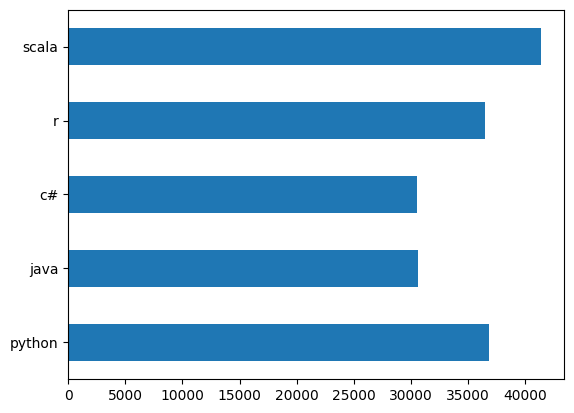

In [57]:
new_df.plot(kind='barh', legend=None)